# KMeans

## Introduction
KMeans is a clustering algorithm.  
The data is clustered by minimizing the cost between the data points and the centroids.  

## Algorithm
1. Choose the number of clusters K.
2. Choose K random points as the initial centroids.
3. Assign each data point to the nearest centroid.
4. Calculate the new centroid of each cluster by taking the average of all the data points assigned to that cluster.
5. Repeat steps 3 and 4 until the centroids do not change.

## Hyperparameters
1. Number of clusters K.
2. Initial centroids.

## Implementation

In [1]:
import numpy as np

class KMeans:
    def __init__(self, K:int)->None:
        self.K = K
        self.centroids = None
        self.labels = None

    def fit(self, X):
        n, m = X.shape
        self.centroids = X[np.random.choice(n, self.K, replace=False)]
        while True:
            labels = np.argmin(np.linalg.norm(X[:, None] - self.centroids, axis=2), axis=1)
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.K)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        self.labels = labels
        
    def loss(self, X):
        return np.linalg.norm(X - self.centroids[self.labels]) ** 2
        
    def predict(self, X):
        return np.argmin(np.linalg.norm(X[:, None] - self.centroids, axis=2), axis=1)

### Blobs Clustering

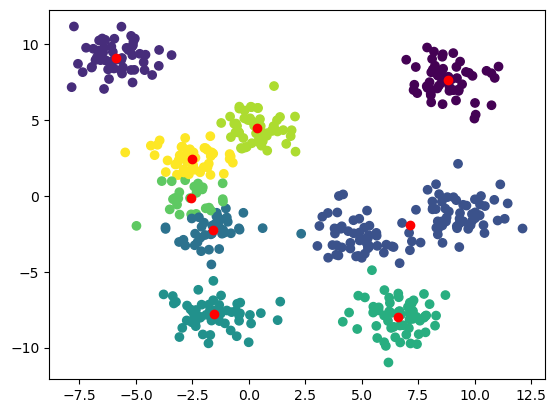

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=9, n_features=2, random_state=44)
kmeans = KMeans(9)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red')
plt.show()

### Hyperparameter Tuning
Hyperparameter K is Tuned by:
- Elbow Method
- Silhouette Score

#### Elbow Method
Elbow Method is used to find the optimal number of clusters.  
##### Cost Function
Elbow Method uses the cost function.  
$$Cost = \sum_{i=1}^{n} \min_{j=1}^{K} ||x_i - \mu_j||^2$$  
The cost function uses WCSS(Within-Cluster-Sum-of-Squares).  

##### Elbow Point
<img src='https://miro.medium.com/v2/resize:fit:670/0*aY163H0kOrBO46S-.png'>
  
The cost function is plotted against the number of clusters.  
The optimal number of clusters is the point where the cost function starts decreasing slowly.(Elbow Point)    


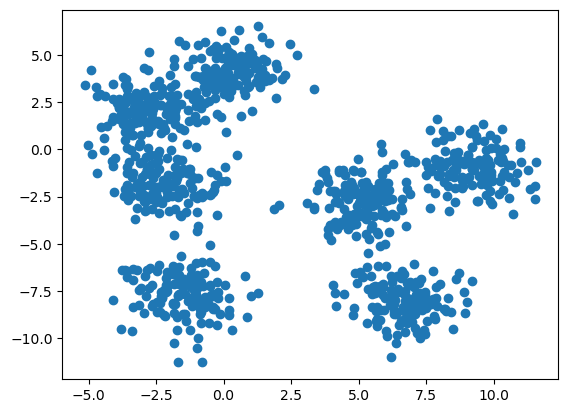

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=7, n_features=2, random_state=44)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

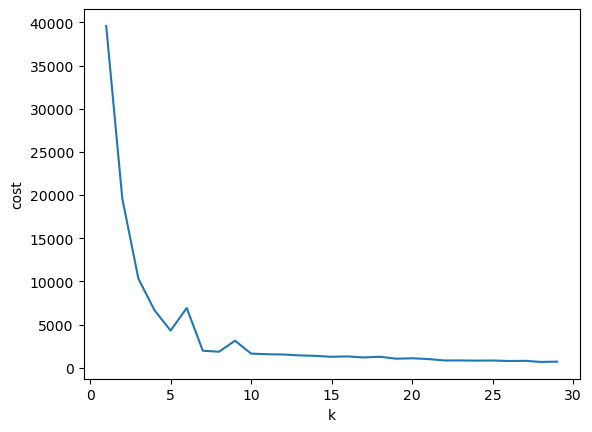

In [4]:
costs = []
for K in range(1, 30):
    kmeans = KMeans(K)
    kmeans.fit(X)
    costs.append(kmeans.loss(X))
plt.plot(range(1, 30), costs)
plt.xlabel('k')
plt.ylabel('cost')
plt.show()

The optimal number of clusters is 7.  
However, the elbow point is not clear.  
So, we use Silhouette Score to find the optimal number of clusters.  

#### [Silhouette Score](SilhouetteScore.ipynb)

In [6]:
def silhouette_score(X, labels):
    n = len(X)
    a = np.array([np.linalg.norm(X - X[i], axis=1)[labels == labels[i]].mean() for i in range(n)])
    b = np.array([np.min([np.linalg.norm(X - X[i], axis=1)[labels == k].mean() for k in set(labels) - {labels[i]}]) for i in range(n)])
    s = (b - a) / np.maximum(a, b)
    return s.mean()

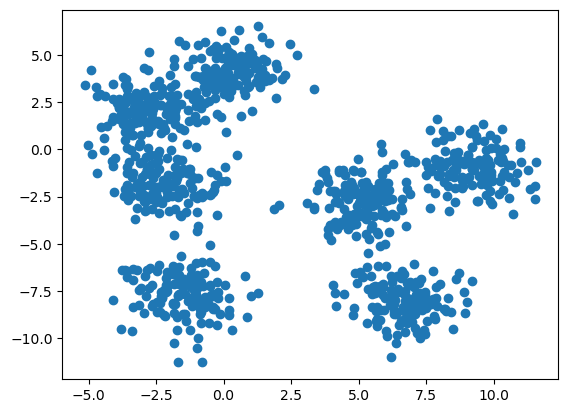

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=7, n_features=2, random_state=44)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

[6]


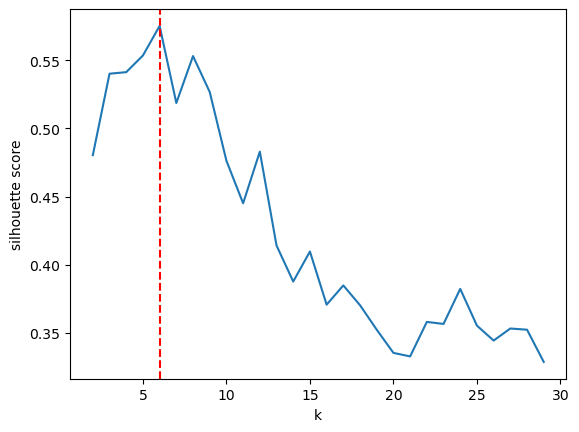

In [8]:
# Calculate silhouette scores
silhouette_scores = []
for K in range(2, 30):
    kmeans = KMeans(K)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels))
    
# Find the best k value
best_k = [K for K in range(2,30) if silhouette_scores[K-2] == max(silhouette_scores)]
print(best_k)
    
#plot the silhouette scores
plt.plot(range(2, 30), silhouette_scores)
for i in range(len(best_k)):
    plt.axvline(x=best_k[i], color='r', linestyle='--')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

The optimal number of clusters is 7.